In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('kidney_disease.csv')

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# We are not able to get or understand anything from the column name which is defined in data we have edit it

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
# updating column names
df.columns = ['Id','Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cell_Count', 
'Red_Blood_Cell_Count', 'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia', 'Target_Class']

In [8]:
df.head(2)

,Id,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target_Class
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [9]:
# total discription of data
df.describe()

,Id,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

In [11]:
df['Packed_Cell_Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [12]:
# we have to convert this packed cell volume column from object data type to float
df['Packed_Cell_Volume'] = pd.to_numeric(df['Packed_Cell_Volume'] , errors= 'coerce')
# coerce means all the errors will be supress at the time of converting it from object datatype to float datatype



In [13]:
df['Packed_Cell_Volume'].dtype

dtype('float64')

In [14]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

In [15]:
df['Red_Blood_Cell_Count'] = pd.to_numeric(df['Red_Blood_Cell_Count'] , errors='coerce')

In [16]:
df['Red_Blood_Cell_Count'].dtype

dtype('float64')

In [17]:
df['White_Blood_Cell_Count'] = pd.to_numeric(df['White_Blood_Cell_Count'] , errors='coerce')

In [18]:
# finding categorical columns
categorical_column = [col for col in df.columns if df[col].dtype == 'object']

In [19]:
categorical_column

['Red_Blood_Cells',
 'Pus_Cell',
 'Pus_Cell_Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Artery_Disease',
 'Appetite',
 'Pedal_Edema',
 'Anemia',
 'Target_Class']

In [20]:
# finding numerical columns
numerical_column = [col for col in df.columns if df[col].dtype == 'float']

In [21]:
numerical_column

['Age',
 'Blood_Pressure',
 'Specific_Gravity',
 'Albumin',
 'Sugar',
 'Blood_Glucose_Random',
 'Blood_Urea',
 'Serum_Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed_Cell_Volume',
 'White_Blood_Cell_Count',
 'Red_Blood_Cell_Count']

In [22]:
#in this step we have tried to find All the unique values of respective all the column 
for col in categorical_column:
    print(f"{col} has {df[col].unique()} values \n")

Red_Blood_Cells has [nan 'normal' 'abnormal'] values 

Pus_Cell has ['normal' 'abnormal' nan] values 

Pus_Cell_Clumps has ['notpresent' 'present' nan] values 

Bacteria has ['notpresent' 'present' nan] values 

Hypertension has ['yes' 'no' nan] values 

Diabetes_Mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

Coronary_Artery_Disease has ['no' 'yes' '\tno' nan] values 

Appetite has ['good' 'poor' nan] values 

Pedal_Edema has ['no' 'yes' nan] values 

Anemia has ['no' 'yes' nan] values 

Target_Class has ['ckd' 'ckd\t' 'notckd'] values 



In [23]:
# we have seen that some values in diabetes mellitus column is miss typed at the time of data entry so we have to correct it to correct values
df['Diabetes_Mellitus'].replace(to_replace={' yes': 'yes','\tno':'no','\tyes':'yes'}, inplace= True)

In [24]:
# same is for Coronary_Artery_Disease column is miss typed at the time of data entry so we have to correct it to correct values
df['Coronary_Artery_Disease'].replace(to_replace={'\tno':'no'}, inplace= True)

In [25]:
# same is for Target_Class column is miss typed at the time of data entry so we have to correct it to correct values
df['Target_Class'].replace(to_replace={'ckd\t':'ckd'}, inplace= True)

In [26]:
df['Coronary_Artery_Disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [27]:
#final check
for col in categorical_column:
    print(f"{col} has {df[col].unique()} values \n")

Red_Blood_Cells has [nan 'normal' 'abnormal'] values 

Pus_Cell has ['normal' 'abnormal' nan] values 

Pus_Cell_Clumps has ['notpresent' 'present' nan] values 

Bacteria has ['notpresent' 'present' nan] values 

Hypertension has ['yes' 'no' nan] values 

Diabetes_Mellitus has ['yes' 'no' nan] values 

Coronary_Artery_Disease has ['no' 'yes' nan] values 

Appetite has ['good' 'poor' nan] values 

Pedal_Edema has ['no' 'yes' nan] values 

Anemia has ['no' 'yes' nan] values 

Target_Class has ['ckd' 'notckd'] values 



In [28]:
# so we can do data encoding also for Taget class column because it contain two value and we can easily encode it 
df['Target_Class'].map({'ckd':'0','notckd':'1'}).value_counts()

Target_Class
0    250
1    150
Name: count, dtype: int64

In [29]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

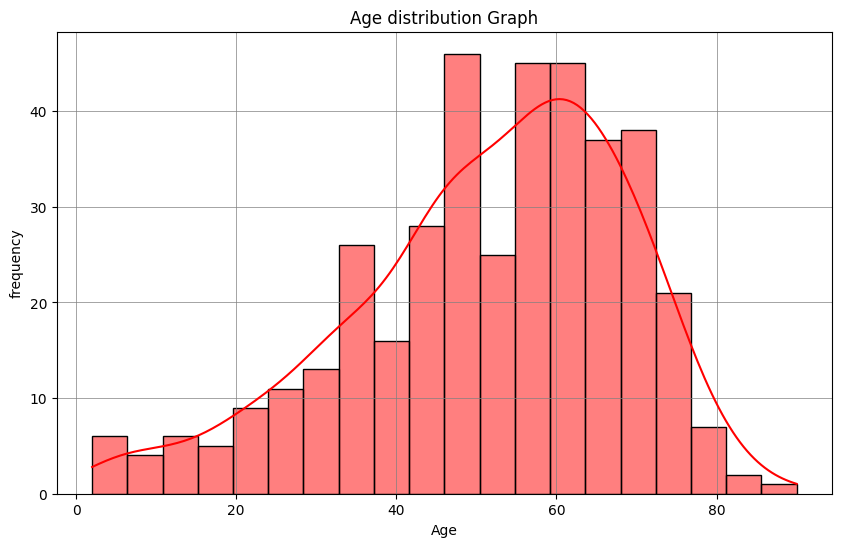

In [30]:
# univariate 
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna() , kde= True , bins=20,color= 'red')

plt.title("Age distribution Graph")
plt.ylabel("frequency")
plt.grid(color = 'grey' , linewidth =0.5)
plt.show()


In [31]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

<Axes: xlabel='Hypertension', ylabel='count'>

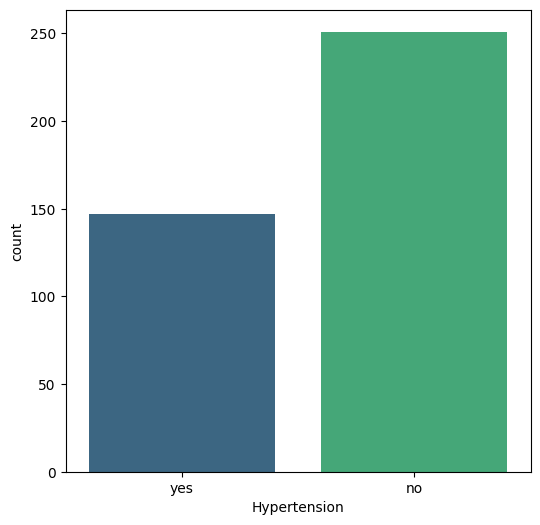

In [32]:
# checking and analyzing hypertension
plt.figure(figsize=(6,6))
sns.countplot(x='Hypertension', data=df , palette='viridis')

In [33]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

In [34]:
df.Bacteria.value_counts()

Bacteria
notpresent    374
present        22
Name: count, dtype: int64

<Axes: xlabel='Bacteria', ylabel='count'>

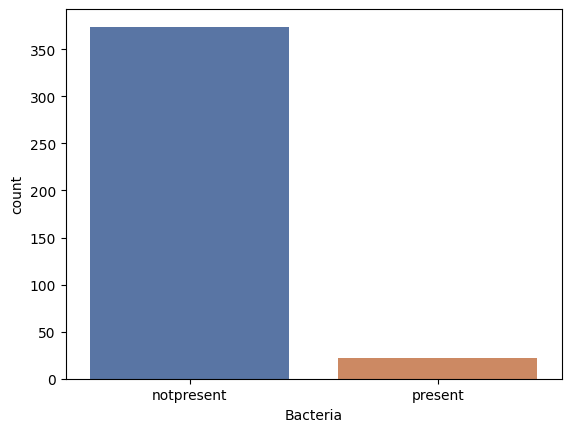

In [35]:
sns.countplot(x ='Bacteria', data=df, palette='deep')

In [36]:
df.columns


Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

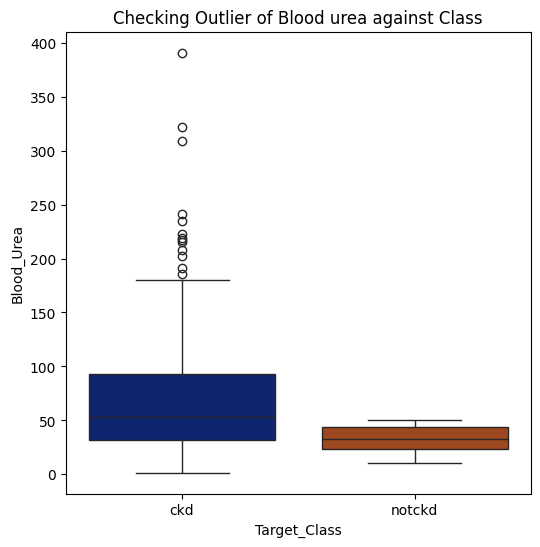

In [37]:
# we are checking blood urea with class 
plt.figure(figsize=(6,6))

sns.boxplot(x = "Target_Class", y="Blood_Urea", data=df, palette='dark')

plt.title('Checking Outlier of Blood urea against Class')

plt.show()

inshights that we can take from above plot is 
 * There are outliers present in Ckd 
 * median of ckd blood urea is more than that of median of notckd blood urea

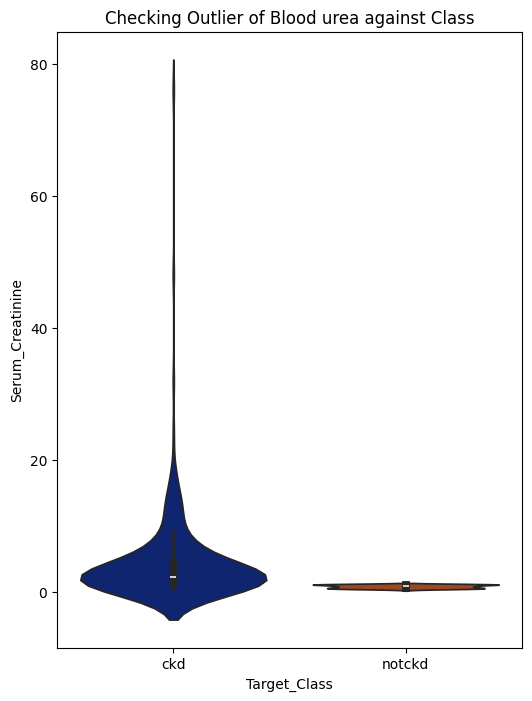

In [38]:
# Voilin plot for checking outliers

plt.figure(figsize=(6,8))

sns.violinplot(x = "Target_Class", y="Serum_Creatinine", data=df, palette='dark')

plt.title('Checking Outlier of Blood urea against Class')

plt.show()

In [39]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

In [40]:
# What is the average age of patients with and without CKD (Target_Class)?
df.groupby('Target_Class')['Age'].mean()

Target_Class
ckd       54.541322
notckd    46.516779
Name: Age, dtype: float64

In [41]:
# Is blood pressure higher among CKD patients compared to non-CKD patients?

df.groupby("Target_Class")['Blood_Pressure'].max()

Target_Class
ckd       180.0
notckd     80.0
Name: Blood_Pressure, dtype: float64

In [42]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

In [43]:
df.Target_Class.unique()

array(['ckd', 'notckd'], dtype=object)

In [44]:
# What's the relationship between albumin levels and CKD status?
df.groupby('Target_Class')['Albumin'].count()

Target_Class
ckd       209
notckd    145
Name: Albumin, dtype: int64

In [45]:
# Do CKD patients have higher blood urea and lower hemoglobin on average?
df.groupby('Target_Class').agg({'Blood_Urea': 'mean' , 'Hemoglobin' :'mean'})


,Blood_Urea,Hemoglobin
Target_Class,,
ckd,72.389030,10.647549
notckd,32.798611,15.188194


<Axes: xlabel='Target_Class', ylabel='Hemoglobin'>

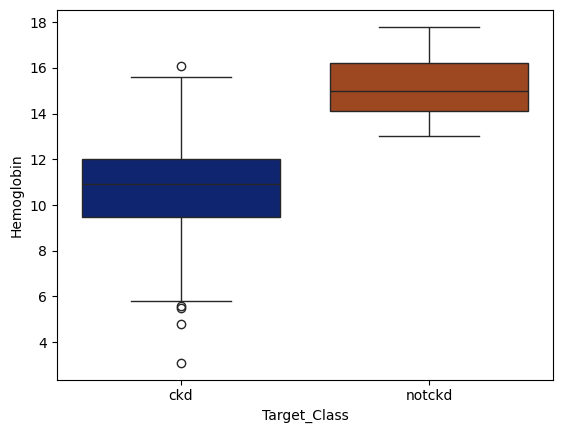

In [46]:
sns.boxplot(x="Target_Class",y="Hemoglobin",data=df, palette= 'dark')

Text(0.5, 1.0, 'Appetitte Distribution')

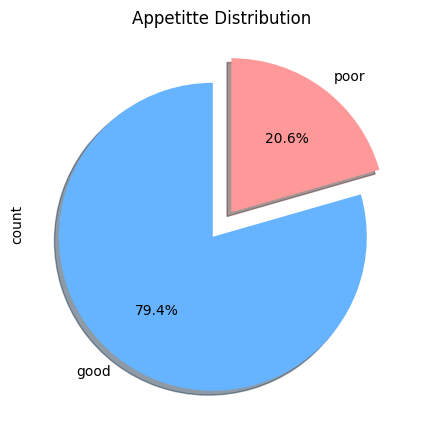

In [47]:
plt.figure(figsize=(5,5))

df.Appetite.value_counts().plot.pie(
    autopct = '%1.1f%%',  
    explode = ( 0.1, 0.1),
    startangle = 90   ,   
    shadow=True,
    colors=['#66b3ff','#ff9999']
)
plt.title("Appetitte Distribution")




<Axes: ylabel='count'>

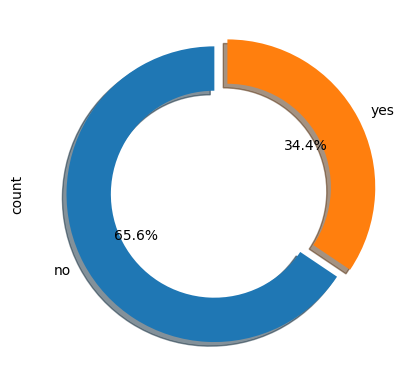

In [48]:
df['Diabetes_Mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops =dict(width =0.3),explode =(0,0.1), shadow = True , startangle =90)

In [49]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')

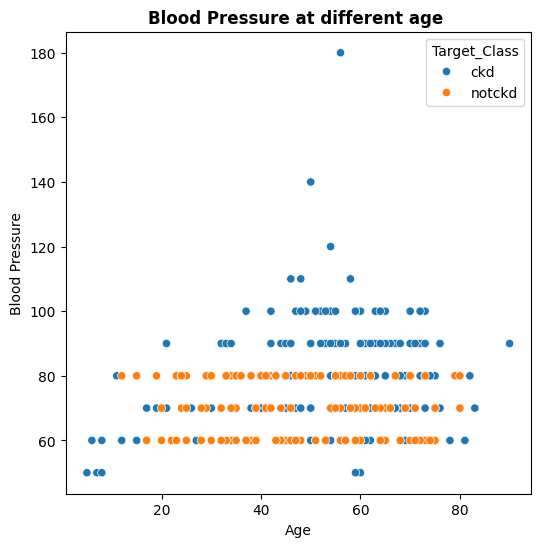

In [50]:
# bivariate analysis
# chacking blood pressure according to age 
plt.figure(figsize=(6,6))
sns.scatterplot(x='Age',y='Blood_Pressure',hue='Target_Class',data=df)
plt.title("Blood Pressure at different age ", fontweight = 'bold')
plt.ylabel("Blood Pressure")
plt.xlabel("Age")
plt.show()

In [51]:
df.columns

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Target_Class'],
      dtype='object')